In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

<Axes: >

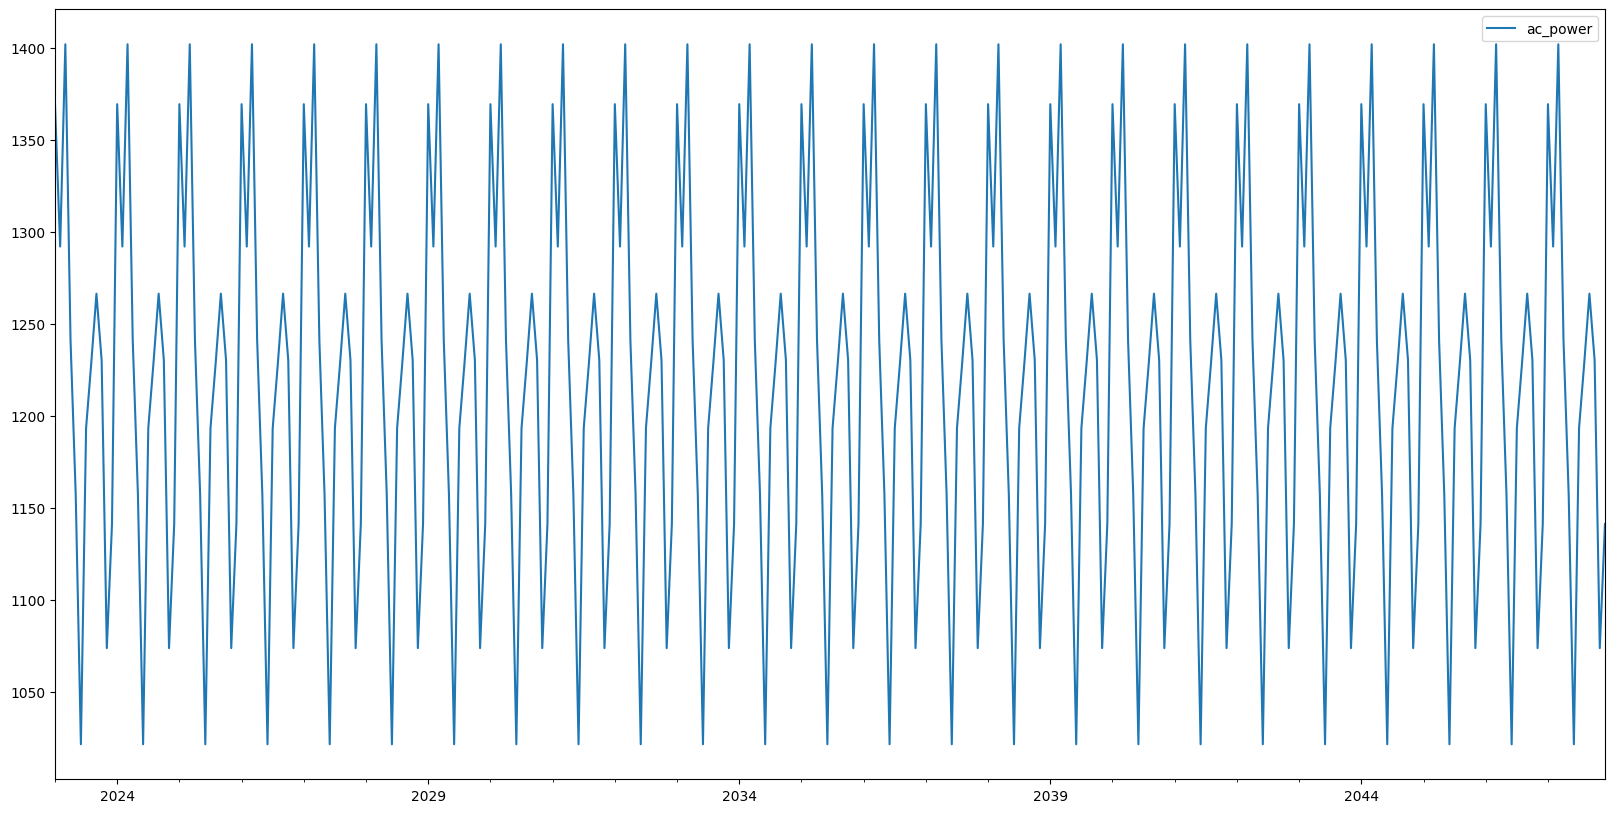

In [3]:
# Load a output and extrapolate it to 25years

with open("data/pvwatts/raw_monthly/system_capacity10_module_type0_array_type0_tilt10.json") as f:
    monthly_data = json.load(f)["outputs"]["ac_monthly"]
    df = pd.DataFrame(
            index = pd.date_range(start="01/01/2023", freq="M", periods=12*25, inclusive="both"),
            data={"ac_power" : monthly_data*25}
                ) 
    
df.plot(kind="line", figsize=(20,10))

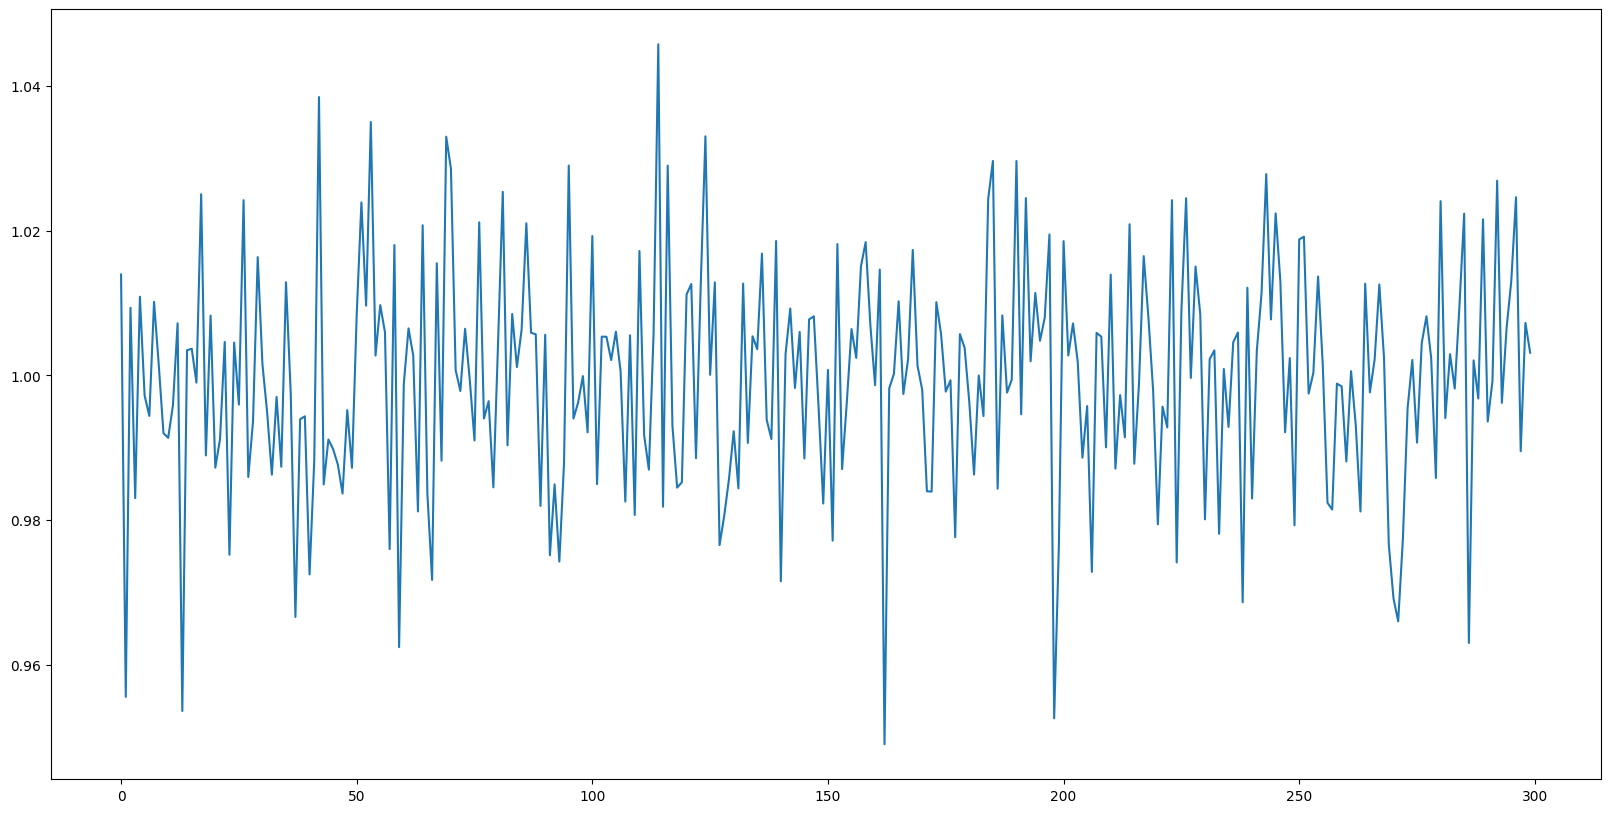

In [4]:
noise = np.random.normal(loc=1.0, scale=0.015, size=len(df))

plt.figure(figsize=(20, 10))
plt.plot(noise)

In [5]:
# Create the degradation factor
degradation_factor = np.linspace(start=0.97, stop=(0.97*0.995**15), num=len(df))

In [6]:
for i in [df, noise, degradation_factor]:
    print(len(i))

300
300
300


In [2]:
raw_dir = Path("data/pvwatts/raw_monthly/")
interim_dir = Path("data/pvwatts/interim_monthly/")

<Axes: >

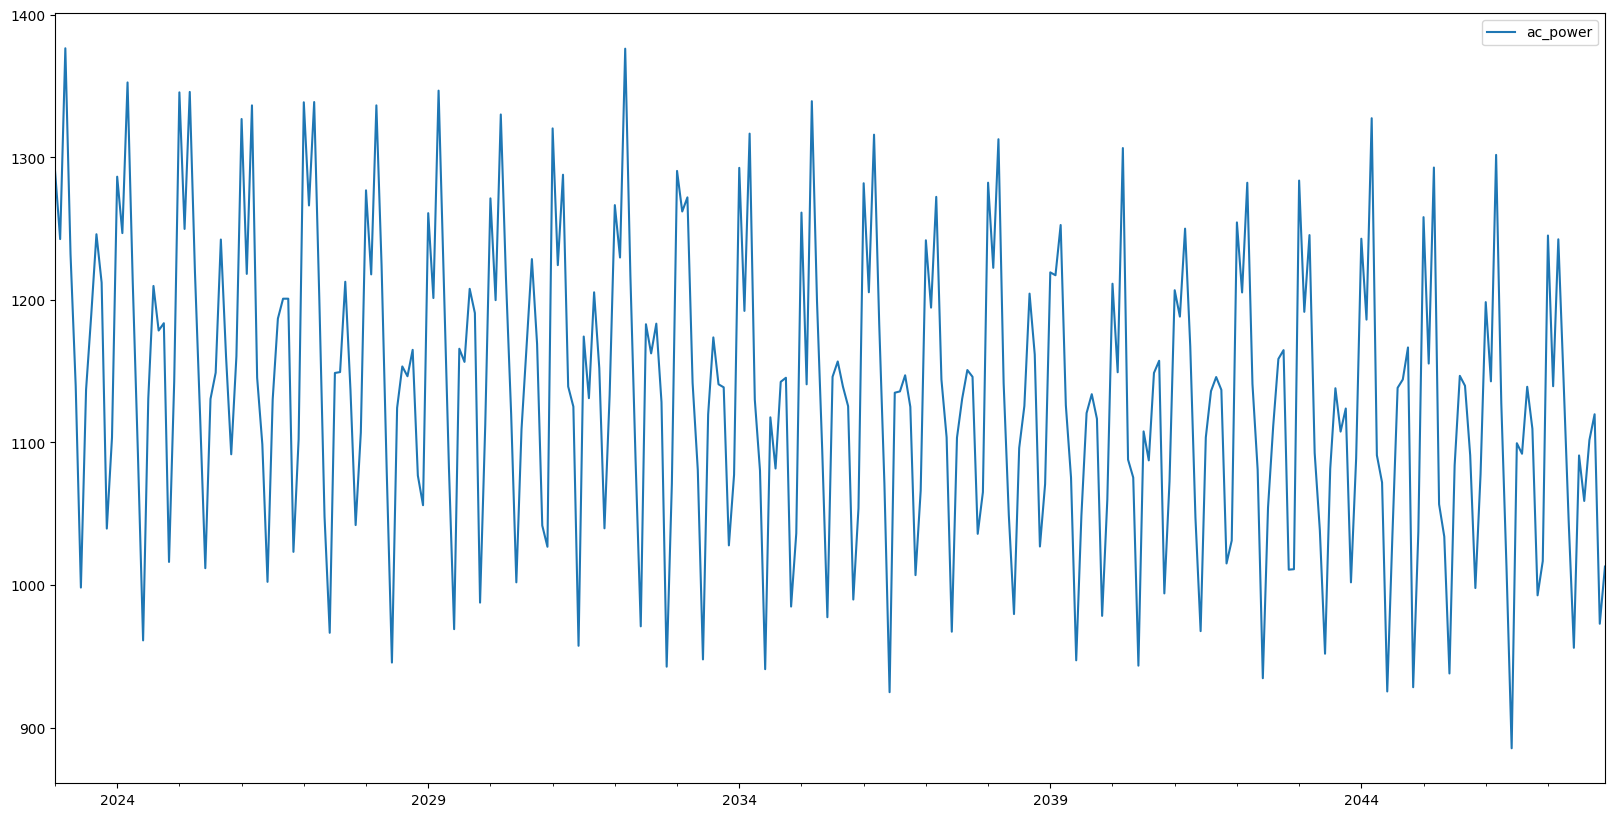

In [11]:
# Testing the processing of one data series

with open("data/pvwatts/raw_monthly/system_capacity10_module_type0_array_type0_tilt10.json") as f:
        monthly_data = json.load(f)["outputs"]["ac_monthly"]*25
        monthly_data = np.asarray(monthly_data)

        noise = np.random.normal(loc=1.0, scale=0.025, size=len(monthly_data))
        
        monthly_data = monthly_data * noise
        monthly_data = monthly_data * degradation_factor

df = pd.DataFrame(
        index = pd.date_range(start="01/01/2023", freq="M", periods=12*25, inclusive="both"),
        data={"ac_power" : monthly_data}
        ) 
    
df.plot(kind="line", figsize=(20,10))

In [13]:
 # Process all raw files and save the files in the interim folder

for path in raw_dir.iterdir():
    with open(path) as f:
        monthly_data = json.load(f)["outputs"]["ac_monthly"]*25
        monthly_data = np.asarray(monthly_data)
    
    noise = np.random.normal(loc=1.0, scale=0.025, size=len(monthly_data))
    
    monthly_data = monthly_data * noise
    monthly_data = monthly_data * degradation_factor
    
    file_name = "data/pvwatts/interim_monthly/" + path.stem
    np.save(file=file_name, arr=monthly_data)


<Axes: >

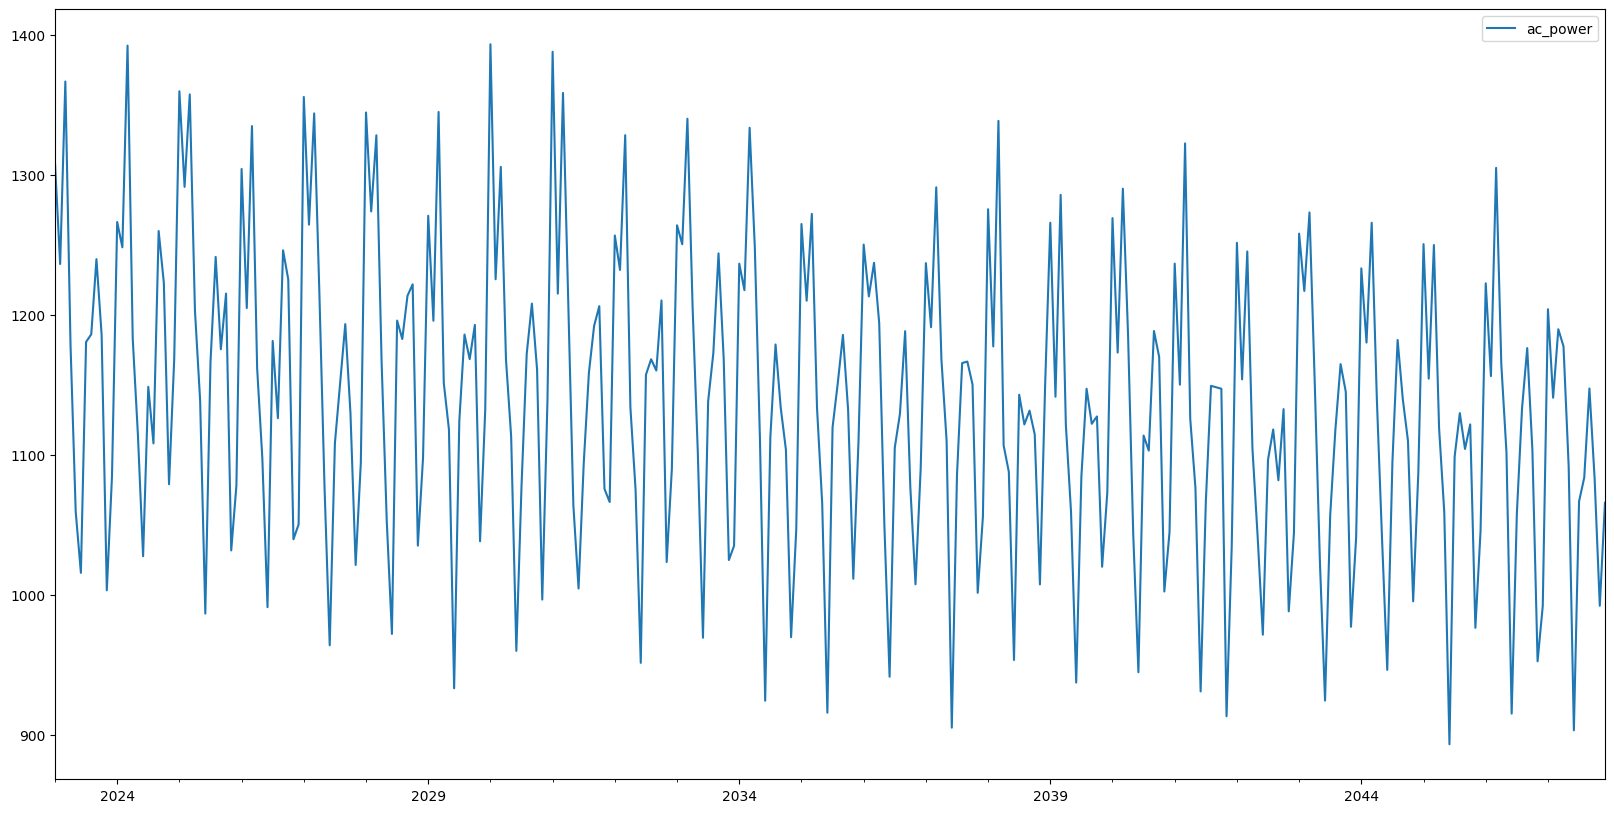

In [3]:
data = np.load("data/pvwatts/interim_monthly/system_capacity10_module_type0_array_type0_tilt10.npy")

df = pd.DataFrame(
        index = pd.date_range(start="01/01/2023", freq="M", periods=12*25, inclusive="both"),
        data={"ac_power" : data}
        ) 
    
df.plot(kind="line", figsize=(20,10))

### Create and Visualize the Degradation Factors

In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

PID: 25% - 30%, from several months to few years  
LID: 2% - 3% within first few hundred hours, then 0.3% to 0.7% per year  
LETID: 6% in first year, up to 10% within 3 years  
Microcracks: 0.5% - 0.9% for mono, >1% for poly   

In [44]:
data = np.load("data/pvwatts/interim_monthly/system_capacity10_module_type0_array_type0_tilt10.npy")

baseline_degradation = np.linspace(start=0.97, stop=(0.97*0.995**25), num=len(data))
baseline_data = np.ones(12*25) # Monthly data series for 25 years

slow_pid = np.linspace(start=1.0, stop=0.70, num=(12*3)) # 30% degradation over 3 years  
mid_pid = np.linspace(start=1.0, stop=0.70, num=(12*2)) # 30% degradation over 2 years 
fast_pid = np.linspace(start=1.0, stop=0.70, num=(12*1)) # 30% degradation over 1 years 
lid = np.linspace(start=1.0, stop=(0.995), num=(12*25)) # 0.5% degradation over 1 year 
low_letid = np.linspace(start=1.0, stop=(0.95), num=(12)) # 5% degradation over 3 years 
mid_letid = np.linspace(start=1.0, stop=(0.97), num=(12)) # 7% degradation over 3 years 
high_letid= np.linspace(start=1.0, stop=(0.90), num=(12)) # 10% degradation over 3 years 
# mech_damage = 0.75 # Not in trend analysis for now

noise = np.random.normal(loc=1.0, scale=0.025, size=len(data))

In [45]:
def extend_array(array:np.ndarray, length:int):
    """Extends a 1-D numpy array to stated length using by the last value of the array"""
    add_length = length - len(array)
    array_tail = np.full(add_length, array[-1])
    return np.append(array, array_tail)

In [46]:
slow_pid = extend_array(slow_pid, length=(len(baseline_data)))
mid_pid = extend_array(mid_pid, length=(len(baseline_data)))
fast_pid = extend_array(fast_pid, length=(len(baseline_data)))
lid = extend_array(lid, length=(len(baseline_data)))
low_letid = extend_array(low_letid, length=(len(baseline_data)))
mid_letid = extend_array(mid_letid, length=(len(baseline_data)))
high_letid = extend_array(high_letid, length=(len(baseline_data)))

In [60]:
for degradation in [slow_pid, mid_pid, fast_pid, lid, low_letid, mid_letid, high_letid]:
    print(len(degradation))
    print(degradation[-1])

300
0.7
300
0.7
300
0.7
300
0.995
300
0.95
300
0.97
300
0.9


<Axes: >

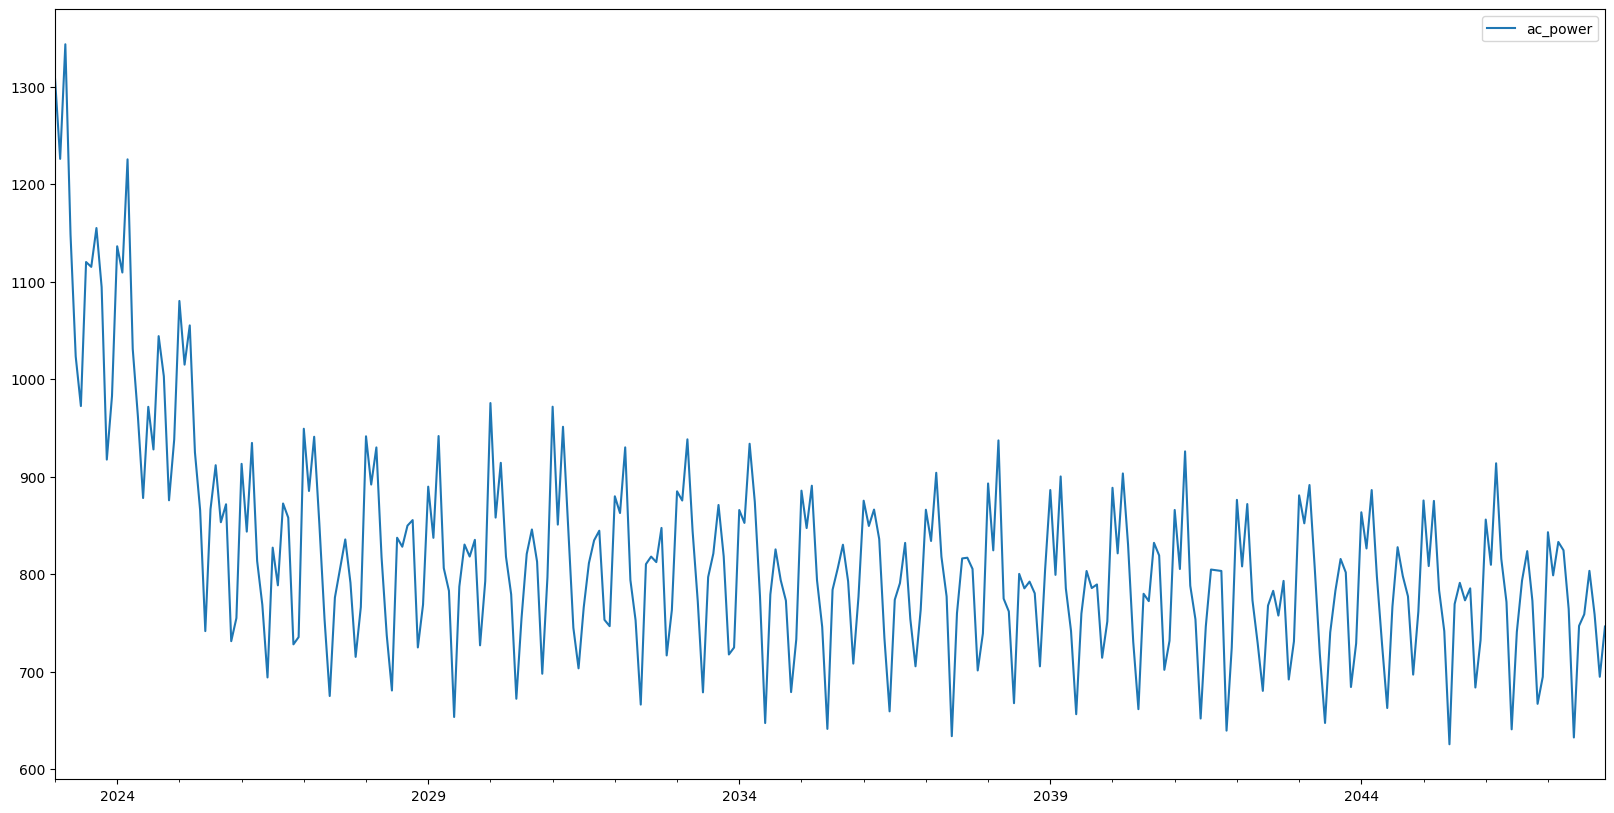

In [54]:
data = np.load("data/pvwatts/interim_monthly/system_capacity10_module_type0_array_type0_tilt10.npy")
data = data * slow_pid

df = pd.DataFrame(
        index = pd.date_range(start="01/01/2023", freq="M", periods=12*25, inclusive="both"),
        data={"ac_power" : data}
        ) 
    
df.plot(kind="line", figsize=(20,10))

In [56]:
monthly_data = np.load("data/pvwatts/interim_monthly/system_capacity10_module_type0_array_type0_tilt10.npy")

monthly_data = monthly_data * slow_pid

file_name = "data/pvwatts/interim_monthly_slow_pid/" + "test_file"
np.save(file=file_name, arr=monthly_data)

<Axes: >

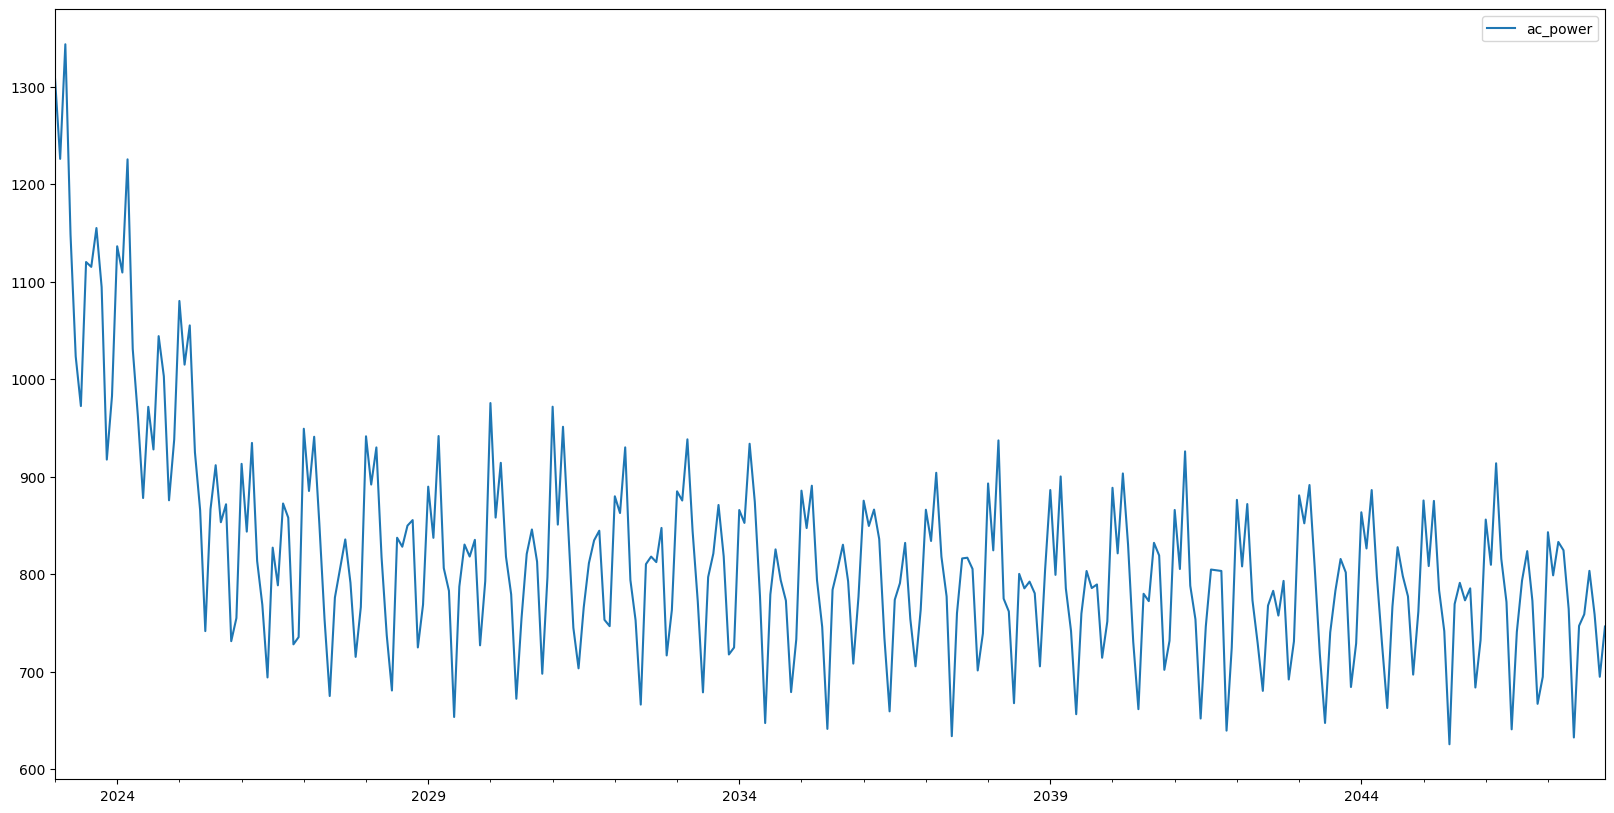

In [57]:
data = np.load("data/pvwatts/interim_monthly_slow_pid/test_file.npy")

df = pd.DataFrame(
        index = pd.date_range(start="01/01/2023", freq="M", periods=12*25, inclusive="both"),
        data={"ac_power" : data}
        ) 
    
df.plot(kind="line", figsize=(20,10))

In [76]:
 # Process all interim files and save the files in the final folder

degradation_dict = {
    "slow_pid": slow_pid,
    "mid_pid": mid_pid,
    "fast_pid": fast_pid,
    "lid": lid,
    "low_letid": low_letid,
    "mid_letid": mid_letid,
    "high_letid": high_letid
}

outer_counter = 0
inner_counter = 0

for path in interim_dir.iterdir():
    with open(path) as f:
        monthly_data = np.load(path)
    
    for k, v in degradation_dict.items():
        monthly_data = monthly_data * v
        file_name = f"data/pvwatts/processed_monthly_{k}/" + path.stem + f"_{k}"
        np.save(file=file_name, arr=monthly_data)

        
        